In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from IPython.display import Audio, display, clear_output

In [2]:
def play_audio(y, sr, autoplay=False):
    display(Audio(y, rate=sr, autoplay=autoplay))

In [3]:
def draw_spec(sound_path):
    #y, sr = librosa.load('test_music.mp3', duration=120)
    y, sr = librosa.load(sound_path)

    S = librosa.feature.melspectrogram(y, sr)
    fig, ax = plt.subplots()
    
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
    fig.colorbar(img, ax=ax, format='%+2.0f dB')
    ax.set(title='Mel-frequency spectrogram')
    
    play_audio(y, sr)

<ipython-input-3-dd1c0f04ade6>:5: FutureWarning: Pass y=[0.00187234 0.00274887 0.00332523 ... 0.00285334 0.00231492 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


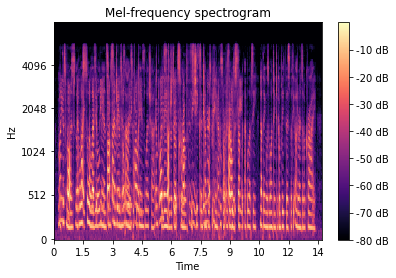

In [4]:
draw_spec("sample_audio/mixed.wav")

<ipython-input-3-dd1c0f04ade6>:5: FutureWarning: Pass y=[-0.00038448 -0.00061859 -0.0007856  ... -0.0007522  -0.00068302
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


<ipython-input-3-dd1c0f04ade6>:5: FutureWarning: Pass y=[0.00186883 0.00228214 0.00252766 ... 0.00285334 0.00231492 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


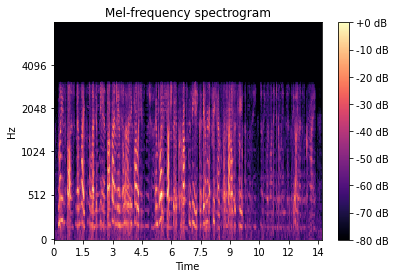

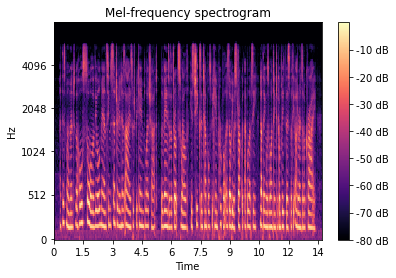

In [6]:
draw_spec("sample_audio/mixed_est1.wav")
draw_spec("sample_audio/sound1.wav")

<ipython-input-3-dd1c0f04ade6>:5: FutureWarning: Pass y=[-0.00029474 -0.00041356 -0.00048644 ... -0.00015586 -0.00012743
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


<ipython-input-3-dd1c0f04ade6>:5: FutureWarning: Pass y=[ 3.5178291e-06  4.6673781e-04  7.9756678e-04 ... -1.1963089e-03
 -1.6402487e-03  0.0000000e+00], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr)


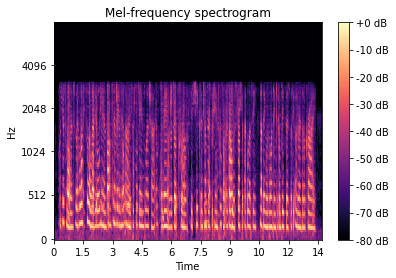

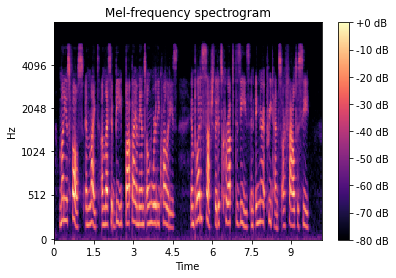

In [7]:
draw_spec("sample_audio/mixed_est2.wav")
draw_spec("sample_audio/sound2.wav")

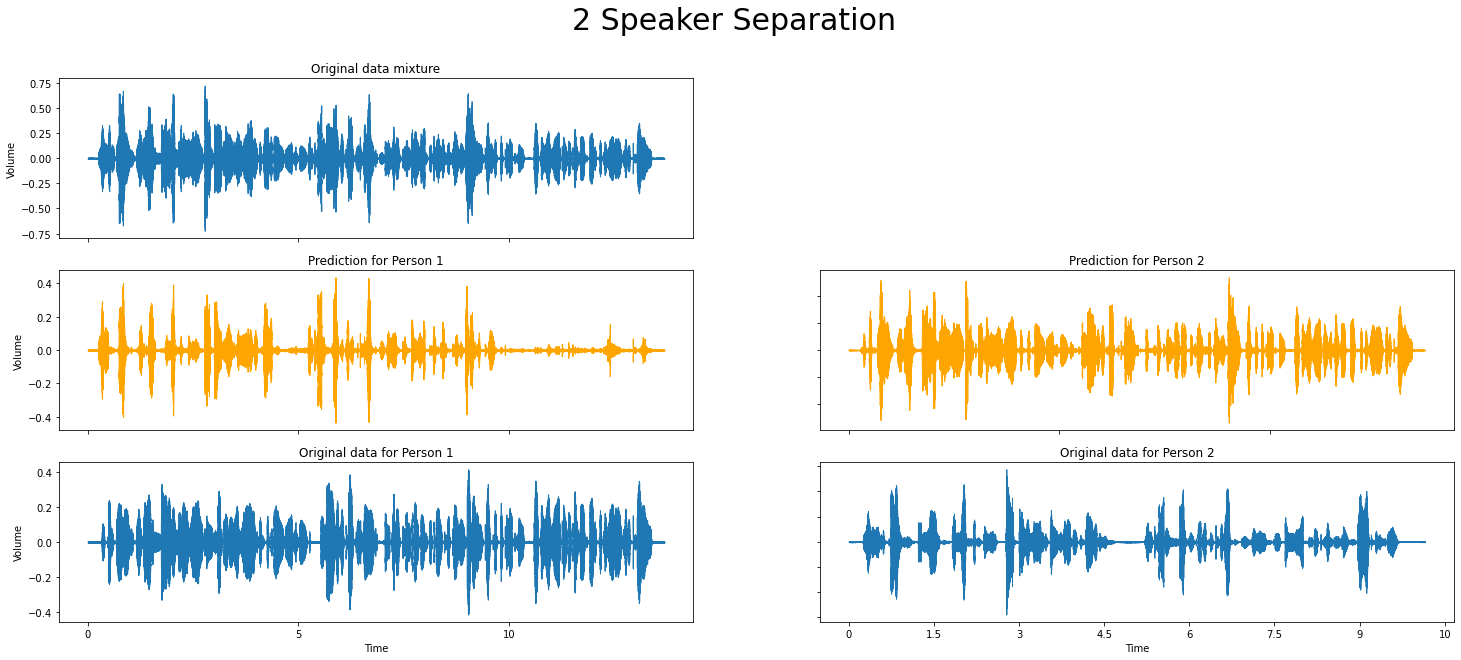

In [8]:
def two_speakers_waveplot():
    # Wave Plot
    subplots  = [(2,1,1),(2,2,)]
    fig, ax = plt.subplots(3, 2,figsize=(25, 10))
    fig.suptitle('2 Speaker Separation', fontsize=30)

    # Original
    data, rate = librosa.load('sample_audio/mixed.wav')

    librosa.display.waveshow(data, sr=rate, ax=ax[0,0])
    librosa.display.waveshow(data, sr=rate, ax=ax[0,1])
    ax[0,0].set_title("Original data mixture")

    ax[0,1].set_visible(False)

    # Predicted
    pdata1, rate = librosa.load('sample_audio/mixed_est1.wav')
    pdata2, rate = librosa.load('sample_audio/mixed_est2.wav')
    ax[1,0].set_title("Prediction for Person 1")
    ax[1,1].set_title("Prediction for Person 2")

    librosa.display.waveshow(pdata1, sr=rate, ax=ax[1,0], color='Orange')
    librosa.display.waveshow(pdata2, sr=rate, ax=ax[1,1], color='Orange')

    # Original Separated
    odata1, rate = librosa.load('sample_audio/sound1.wav')
    odata2, rate = librosa.load('sample_audio/sound2.wav')
    ax[2,0].set_title("Original data for Person 1")
    ax[2,1].set_title("Original data for Person 2")

    librosa.display.waveshow(odata1, sr=rate, ax=ax[2,0])
    librosa.display.waveshow(odata2, sr=rate, ax=ax[2,1])

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Volume')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()

two_speakers_waveplot()

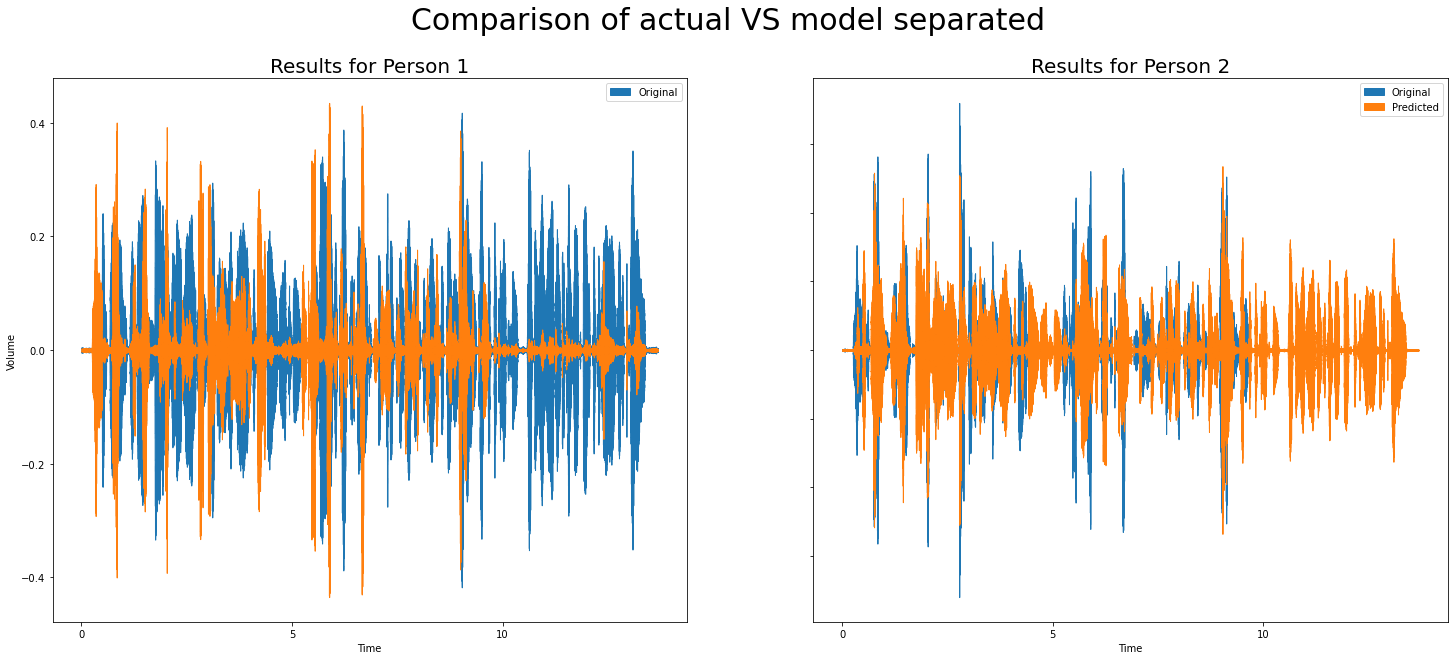

In [9]:
def two_speakers_comparision():
    # Wave Plot
    fig, ax = plt.subplots(1, 2,figsize=(25, 10))
    fig.suptitle('Comparison of actual VS model separated', fontsize=30)

    odata1, rate = librosa.load('sample_audio/sound1.wav')
    odata2, rate = librosa.load('sample_audio/sound2.wav')

    librosa.display.waveshow(odata1, sr=rate, ax=ax[0], label='Original')
    librosa.display.waveshow(odata2, sr=rate, ax=ax[1], label='Original')
    ax[0].set_title("Results for Person 1", fontsize = 20)
    ax[0].legend()

    # blue = actual
    # orange = predicted
    # 1 = person 1
    # 2 = person 2

    # Overlapped
    pdata1, rate = librosa.load('sample_audio/mixed_est1.wav')
    pdata2, rate = librosa.load('sample_audio/mixed_est2.wav')
    librosa.display.waveshow(pdata1, sr=rate, ax=ax[0], label='Predicted')
    librosa.display.waveshow(pdata2, sr=rate, ax=ax[1], label='Predicted')
    ax[1].set_title("Results for Person 2", fontsize = 20)
    ax[1].legend()

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Volume')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()

two_speakers_comparision()

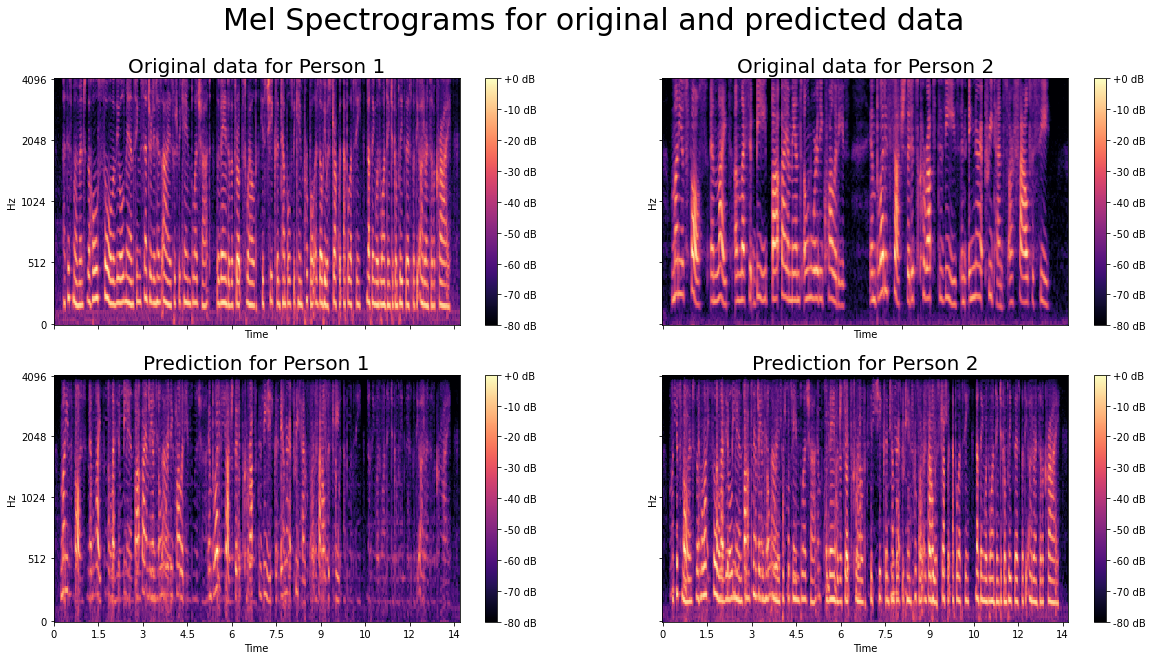

In [10]:
def two_speakers_spectrogram():
    fig, ax = plt.subplots(2, 2,figsize=(20, 10))
    fig.suptitle('Mel Spectrograms for original and predicted data', fontsize=30)

    odata1, rate = librosa.load('sample_audio/sound1.wav')
    odata2, rate = librosa.load('sample_audio/sound2.wav')
    
    pdata1, rate = librosa.load('sample_audio/mixed_est1.wav')
    pdata2, rate = librosa.load('sample_audio/mixed_est2.wav')

    for a in ax.flat:
        a.set(xlabel='Time', ylabel='Hz')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Original data
    S = librosa.feature.melspectrogram(y=odata1, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,0])
    fig.colorbar(img, ax=ax[0,0], format='%+2.0f dB')
    ax[0,0].set_title("Original data for Person 1", fontsize = 20)

    S = librosa.feature.melspectrogram(y=odata2, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[0,1])
    fig.colorbar(img, ax=ax[0,1], format='%+2.0f dB')
    ax[0,1].set_title("Original data for Person 2", fontsize = 20)

    # Predicted Data
    S = librosa.feature.melspectrogram(y=pdata1, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,0])
    fig.colorbar(img, ax=ax[1,0], format='%+2.0f dB')
    ax[1,0].set_title("Prediction for Person 1", fontsize = 20)

    S = librosa.feature.melspectrogram(y=pdata2, sr=rate, n_mels=128,fmax=4098)
    S_dB = librosa.power_to_db(S, ref=np.max)
    img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=rate,fmax=4098, ax=ax[1,1])
    fig.colorbar(img, ax=ax[1,1], format='%+2.0f dB')
    ax[1,1].set_title("Prediction for Person 2", fontsize = 20)

two_speakers_spectrogram()

In [25]:
from asteroid.metrics import get_metrics

def get_all_metrics():
    
    # Mixed
    mix, rate = librosa.load('sample_audio/mixed.wav')
    
    # Original
    s1, rate = librosa.load('sample_audio/sound1.wav')
    s2, rate = librosa.load('sample_audio/sound2.wav')
    
    # Estimated
    est_s1, rate = librosa.load('sample_audio/mixed_est1.wav')
    est_s2, rate = librosa.load('sample_audio/mixed_est2.wav')
    
    clean = np.vstack((s1, s2))
    est = np.vstack((est_s1, est_s2))
    
    print(clean.shape)
    
    metrics_dict = get_metrics(mix, clean, est, sample_rate=8000, metrics_list='all')
    print(metrics_dict)

In [26]:
get_all_metrics()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 301865 and the array at index 1 has size 223918

In [34]:
rand1 = np.random.randn(4)
rand2 = np.random.randn(5)

rand1 = rand1.reshape(1,4)
rand2 = rand2.reshape(1,5)
print(rand2.shape)

print(np.vstack((rand1, rand2)).shape)

(1, 5)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 5

In [35]:
from asteroid.data import LibriMix

train_loader, val_loader = LibriMix.loaders_from_mini(
     task='sep_clean', batch_size=4
)

Drop 0 utterances from 800 (shorter than 3 seconds)
Drop 0 utterances from 200 (shorter than 3 seconds)


In [41]:
for batch_idx, (data, target) in enumerate(train_loader):
    
    random_mix = data[0]
    random_target = target[0]
    
    print(random_mix.shape)
    print(random_target.shape)
    
    break

torch.Size([24000])
torch.Size([2, 24000])


In [46]:
from asteroid.models import ConvTasNet
import torch

model = ConvTasNet(n_src = 2, kernel_size = 16, n_filters = 512, sample_rate = 8000)
model = model.to(device="cuda")

In [47]:
model.load_state_dict(torch.load('weights/10_epoch_model.pth'))

<All keys matched successfully>

In [61]:
model.eval()

random_mix = random_mix.to(device="cuda")
random_est = model(random_mix)
random_est

tensor([[ 0.0008,  0.0005, -0.0008,  ...,  0.0011,  0.0004,  0.0007],
        [ 0.0028,  0.0014, -0.0041,  ...,  0.0018,  0.0010,  0.0016]],
       device='cuda:0', grad_fn=<SqueezeBackward1>)

In [62]:
random_est.shape

torch.Size([2, 24000])

In [79]:
import pprint

metrics_dict = get_metrics(random_mix.cpu().detach().numpy(), random_target.cpu().detach().numpy(), random_est.cpu().detach().numpy(), sample_rate=8000, metrics_list='all')
pprint.pprint(metrics_dict)

{'input_pesq': 3.934750556945801,
 'input_sar': 28.28840552880433,
 'input_sdr': 7.4975376739032145,
 'input_si_sdr': 6.865206956863403,
 'input_sir': 7.546190904711902,
 'input_stoi': 0.9072806256745396,
 'pesq': 4.548638343811035,
 'sar': 286.0524142270863,
 'sdr': 297.9890902500691,
 'si_sdr': 90.5447006225586,
 'sir': 286.52094481387064,
 'stoi': 0.9999999999999994}


In [73]:
random_target.is_cuda

True

In [84]:
for batch_idx, (data, target) in enumerate(val_loader):
    
    print(data.shape)
    break

torch.Size([4, 24000])
